In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
from sklearn.preprocessing import LabelEncoder

**Importing data**

In [5]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

**Train data processing:**

In [6]:
train = train.drop('Cabin', axis=1)
train = train.drop('PassengerId', axis=1)
train = train.drop('Name', axis=1)
train = train.drop('Ticket', axis=1)

In [7]:
tr_avg_age=train['Age'].mean()
train['Age'].fillna(value=tr_avg_age, inplace=True)

In [8]:
train=train.dropna()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


# **LabelEncoder**

In [10]:
label_encoder=LabelEncoder()

In [11]:
train['Embarked']=label_encoder.fit_transform(train['Embarked'])
train['Sex']=label_encoder.fit_transform(train['Sex'])

In [12]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [13]:
X_train= train.values[:, 1:8]
Y_train= train.values[:, 0]

# Model tarainig 

In [14]:
 clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=5, min_samples_leaf=5)

In [15]:
clf_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

**Test data**

In [16]:
test = test.drop('Cabin', axis=1)
test = test.drop('Name', axis=1)
test = test.drop('Ticket', axis=1)

In [17]:
test_avg_age=test['Age'].mean()
test['Age'].fillna(value=test_avg_age, inplace=True)

In [18]:
test_avg_age=test['Fare'].mean()
test['Fare'].fillna(value=test_avg_age, inplace=True)

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [20]:
test['Embarked']=label_encoder.fit_transform(test['Embarked'])
test['Sex']=label_encoder.fit_transform(test['Sex'])

In [21]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [22]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [23]:
X_test= test.values[:, 1:8]


**Predicting**

In [24]:
test['Survived'] = clf_gini.predict(X_test)

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Survived     418 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 29.5 KB


In [26]:
final=test.loc[:, ['PassengerId', 'Survived']]

**Final results**

In [27]:
final.head(10)

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
5,897,0.0
6,898,1.0
7,899,0.0
8,900,1.0
9,901,0.0


In [28]:
final.to_csv('final.csv')

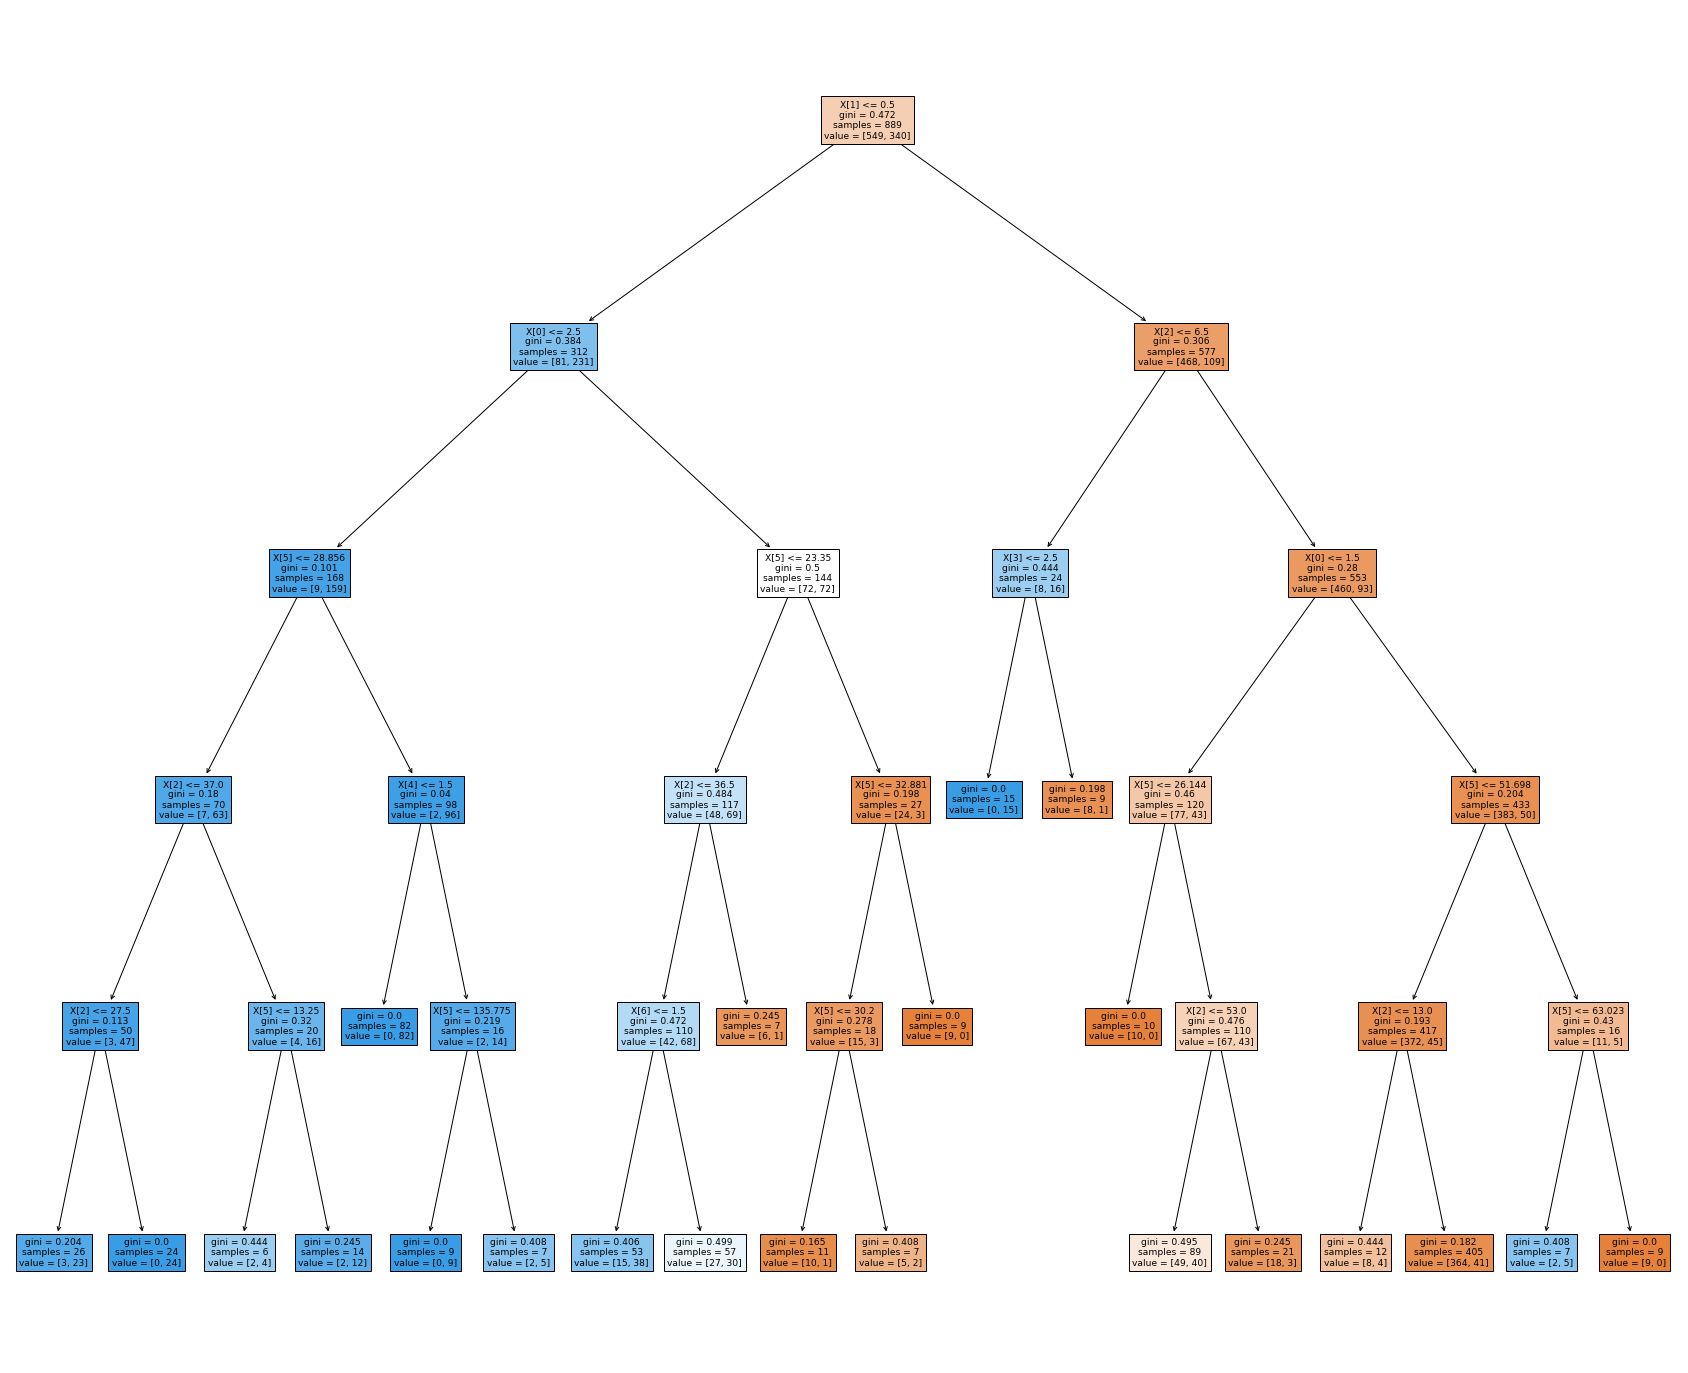

In [29]:
fig= plt.figure(figsize=(30,25))
tree.plot_tree(clf_gini, filled=True)
plt.show()